Linear Deep Model (4 FC and 3 ReLu)

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import sys
from PIL import Image
from sklearn.model_selection import train_test_split
from functions import split_image, get_piece_means, dtws
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ExponentialLR, ReduceLROnPlateau
from statsmodels.tsa.stattools import adfuller

In [2]:
# Power Maps and Magnetograms
source = 'dopplergrams' #'cont_intensity'
size = 9
ARs = [11158,11627,12085]
pm_means = []; mag_means = []
for AR in ARs: 
    pm_means.append(get_piece_means(np.load('/Users/skasapis/Desktop/ames_code/AR{}/power_maps_{}_{}.npz'.format(AR,source,AR),allow_pickle=True)['arr_0'],size))
    mag_means.append(get_piece_means(np.load('/Users/skasapis/Desktop/ames_code/AR{}/magnetograms{}.npz'.format(AR,AR),allow_pickle=True)['arr_0'],size))


In [3]:
# Initialize the result array as the first array in the list
all_pm_means = pm_means[0]
all_mag_means = mag_means[0]

# Iterate over the rest of the arrays and concatenate them
for i in range(1, len(pm_means)):
    all_pm_means = np.concatenate((all_pm_means, pm_means[i]), axis=0)  # axis=0 for vertical concatenation, axis=1 for horizontal
    all_mag_means = np.concatenate((all_mag_means, mag_means[i]), axis=0)  # axis=0 for vertical concatenation, axis=1 for horizontal

In [4]:
_1, pvalue, _2, _3, _4, _5 = adfuller(all_pm_means[0,:])
print('p value = ',pvalue,' (if above 0.05, data is not stationary')

p value =  0.17987897473868197  (if above 0.05, data is not stationary


# Preprocess Data

In [5]:
# Scale to [0,1]
all_pm_means = (all_pm_means - np.min(all_pm_means)) / (np.max(all_pm_means) - np.min(all_pm_means)) # Apply min-max scaling to power maps
all_mag_means = (all_mag_means - np.min(all_mag_means)) / (np.max(all_mag_means) - np.min(all_mag_means)) # Apply min-max scaling to magnetograms


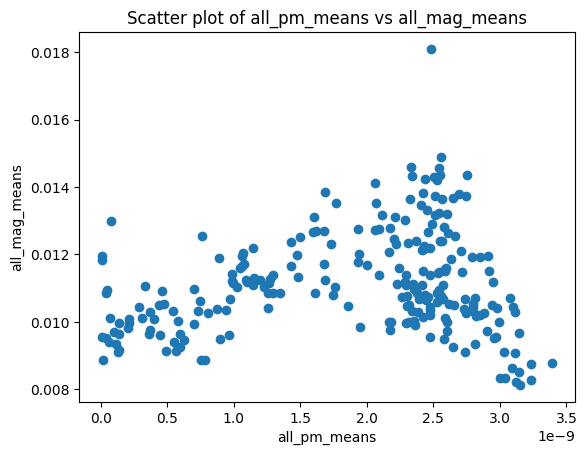

In [14]:
plt.scatter(all_pm_means[81,:], all_mag_means[81,:])
plt.xlabel('all_pm_means')
plt.ylabel('all_mag_means')
plt.title('Scatter plot of all_pm_means vs all_mag_means')
plt.show()

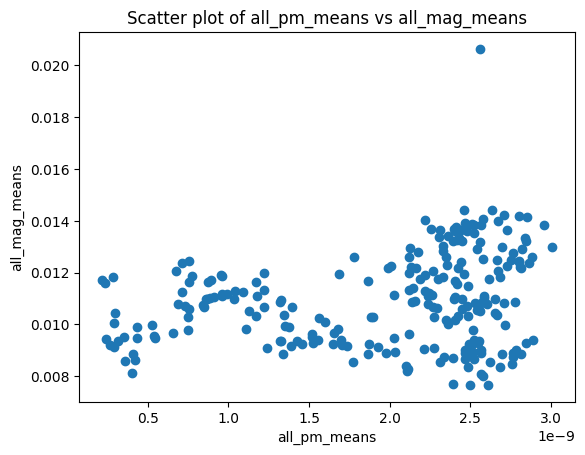

In [16]:
plt.scatter(all_pm_means[82,:], all_mag_means[82,:])
plt.xlabel('all_pm_means')
plt.ylabel('all_mag_means')
plt.title('Scatter plot of all_pm_means vs all_mag_means')
plt.show()